# ARIMA model 

- Temperature Dataset

### Step 1: Importing neccesary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load the dataset

In [51]:
# Load the dataset
data = pd.read_csv('temperature-1.csv')
data

,Unnamed: 0,Datetime,Hourly_Temp
0,0,04-01-2022 00:00,20.867
1,1,04-01-2022 01:00,21.000
2,2,04-01-2022 02:00,20.867
3,3,04-01-2022 03:00,20.650
4,4,04-01-2022 04:00,20.400
...,...,...,...
7051,7051,24-10-2022 19:00,25.567
7052,7052,24-10-2022 20:00,25.183
7053,7053,24-10-2022 21:00,24.600
7054,7054,24-10-2022 22:00,23.986


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7056 non-null   int64  
 1   Datetime     7056 non-null   object 
 2   Hourly_Temp  7056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.5+ KB


### Step 3: Data Preprocessing

In [53]:
# Convert the 'Datetime' column to a datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

# Set the 'Datetime' column as the DataFrame index
data.set_index('Datetime', inplace=True)

data

,Unnamed: 0,Hourly_Temp
Datetime,,
2022-01-04 00:00:00,0,20.867
2022-01-04 01:00:00,1,21.000
2022-01-04 02:00:00,2,20.867
2022-01-04 03:00:00,3,20.650
2022-01-04 04:00:00,4,20.400
...,...,...
2022-10-24 19:00:00,7051,25.567
2022-10-24 20:00:00,7052,25.183
2022-10-24 21:00:00,7053,24.600


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2022-01-04 00:00:00 to 2022-10-24 23:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7056 non-null   int64  
 1   Hourly_Temp  7056 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 165.4 KB


### Step 4: Data Visualization

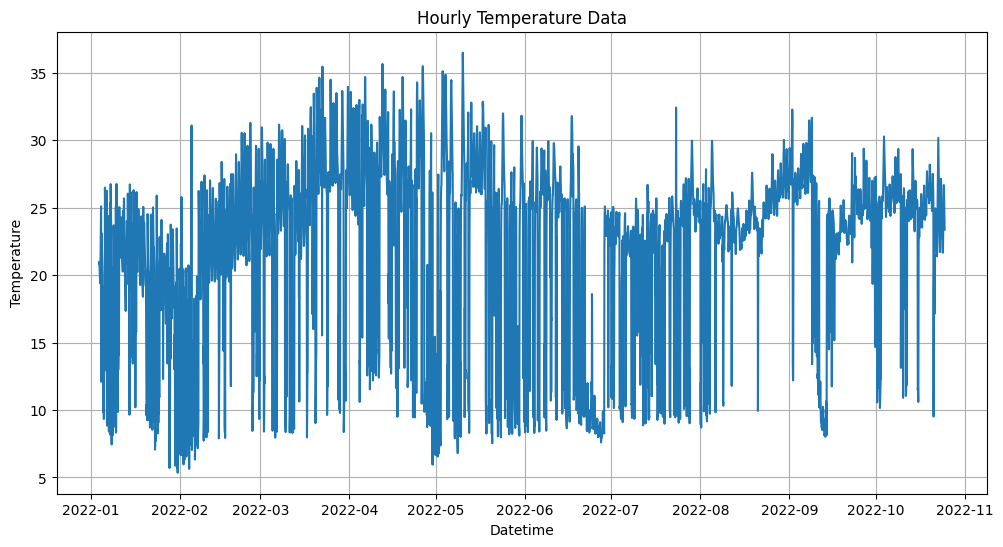

In [55]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'])
plt.title('Hourly Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


### Step 5: Check Stationarity

In [56]:
# Define a function to check stationarity and perform differencing
def test_stationarity(timeseries):
    # Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

    return dfoutput

# Check stationarity
result = test_stationarity(data['Hourly_Temp'])
print("Augmented Dickey-Fuller Test:")
print(result)

Augmented Dickey-Fuller Test:
Test Statistic                -9.396891e+00
p-value                        6.338903e-16
#Lags Used                     2.500000e+01
Number of Observations Used    7.030000e+03
Critical Value (1%)           -3.431281e+00
Critical Value (5%)           -2.861951e+00
Critical Value (10%)          -2.566989e+00
dtype: float64


### Step 6: Perform Differencing

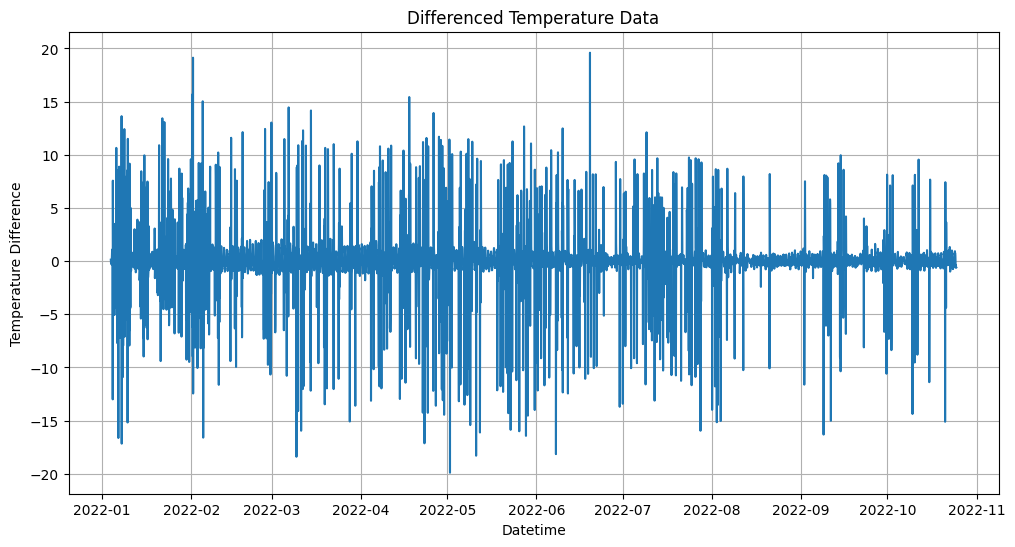

In [57]:
# Differencing to make the series stationary
data['Temp_Diff'] = data['Hourly_Temp'] - data['Hourly_Temp'].shift(1)
data.dropna(inplace=True)

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['Temp_Diff'])
plt.title('Differenced Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature Difference')
plt.grid(True)
plt.show()

### Step 7: Check Stationarity of Differenced Data

In [58]:
# Check stationarity of differenced data
result = test_stationarity(data['Temp_Diff'])
print("Augmented Dickey-Fuller Test on Differenced Data:")
print(result)

Augmented Dickey-Fuller Test on Differenced Data:
Test Statistic                  -20.546080
p-value                           0.000000
#Lags Used                       35.000000
Number of Observations Used    7019.000000
Critical Value (1%)              -3.431282
Critical Value (5%)              -2.861952
Critical Value (10%)             -2.566989
dtype: float64


### Step 8: Fit SARIMA Model

In [59]:
# Fit SARIMA model
model = SARIMAX(data['Hourly_Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
results = model.fit(disp=False)

In [60]:
results

### Step 9: Forecast Future Values

In [61]:
# Forecast future values
forecast_steps = 24  # Adjust this as needed
forecast = results.get_forecast(steps=forecast_steps)


### Step 10: Create Date Range for Forecasting

In [62]:
# Create a date range for forecasting
date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='H')

### Step 11: Get Forecasted Values and Confidence Intervals

In [63]:
# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [64]:
forecast_conf_int

,lower Hourly_Temp,upper Hourly_Temp
2022-10-25 00:00:00,18.000924,28.704631
2022-10-25 01:00:00,15.215395,30.886256
2022-10-25 02:00:00,11.897748,31.253128
2022-10-25 03:00:00,10.171785,32.619722
2022-10-25 04:00:00,9.358990,34.521724
2022-10-25 05:00:00,8.384785,35.996730
2022-10-25 06:00:00,7.364707,37.225642
2022-10-25 07:00:00,6.350690,38.302707
2022-10-25 08:00:00,5.399080,39.313493
2022-10-25 09:00:00,4.503053,40.272361


### Step 12: Create a Forecast DataFrame

In [65]:
# Create a forecast DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast_values, 'Lower_CI': forecast_conf_int.iloc[:, 0], 'Upper_CI': forecast_conf_int.iloc[:, 1]}, index=date_range[1:])

In [66]:
forecast_df

,Forecast,Lower_CI,Upper_CI
2022-10-25 00:00:00,23.352778,18.000924,28.704631
2022-10-25 01:00:00,23.050826,15.215395,30.886256
2022-10-25 02:00:00,21.575438,11.897748,31.253128
2022-10-25 03:00:00,21.395753,10.171785,32.619722
2022-10-25 04:00:00,21.940357,9.358990,34.521724
2022-10-25 05:00:00,22.190758,8.384785,35.996730
2022-10-25 06:00:00,22.295175,7.364707,37.225642
2022-10-25 07:00:00,22.326698,6.350690,38.302707
2022-10-25 08:00:00,22.356287,5.399080,39.313493
2022-10-25 09:00:00,22.387707,4.503053,40.272361


### Step 13: Plot the Original Data and the Forecast

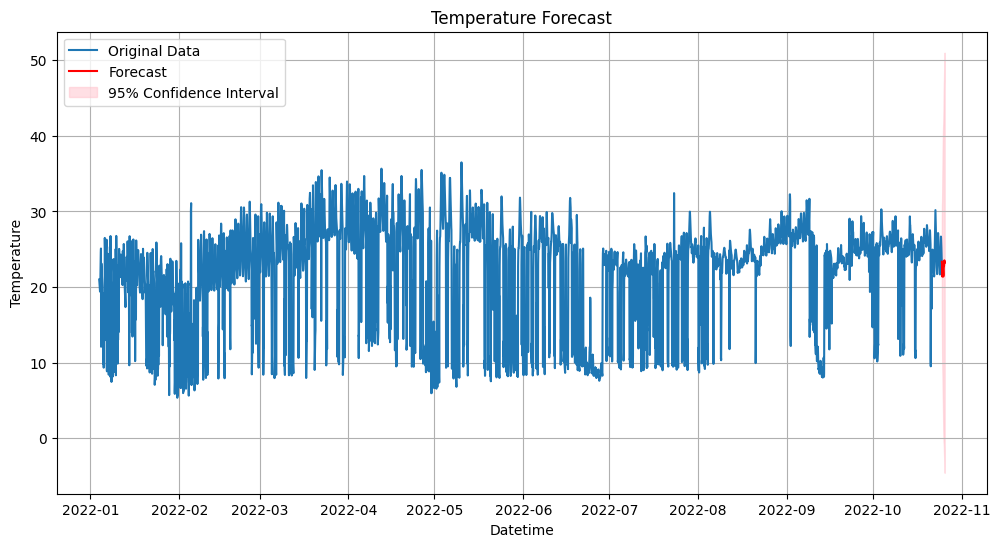

In [67]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'], label='Original Data')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.5, label='95% Confidence Interval')
plt.title('Temperature Forecast')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
data['Hourly_Temp_avg'] = data['Hourly_Temp'].mean()

In [69]:
data

,Unnamed: 0,Hourly_Temp,Temp_Diff,Hourly_Temp_avg
Datetime,,,,
2022-01-04 01:00:00,1,21.000,0.133,21.86761
2022-01-04 02:00:00,2,20.867,-0.133,21.86761
2022-01-04 03:00:00,3,20.650,-0.217,21.86761
2022-01-04 04:00:00,4,20.400,-0.250,21.86761
2022-01-04 05:00:00,5,20.100,-0.300,21.86761
...,...,...,...,...
2022-10-24 19:00:00,7051,25.567,-0.593,21.86761
2022-10-24 20:00:00,7052,25.183,-0.384,21.86761
2022-10-24 21:00:00,7053,24.600,-0.583,21.86761


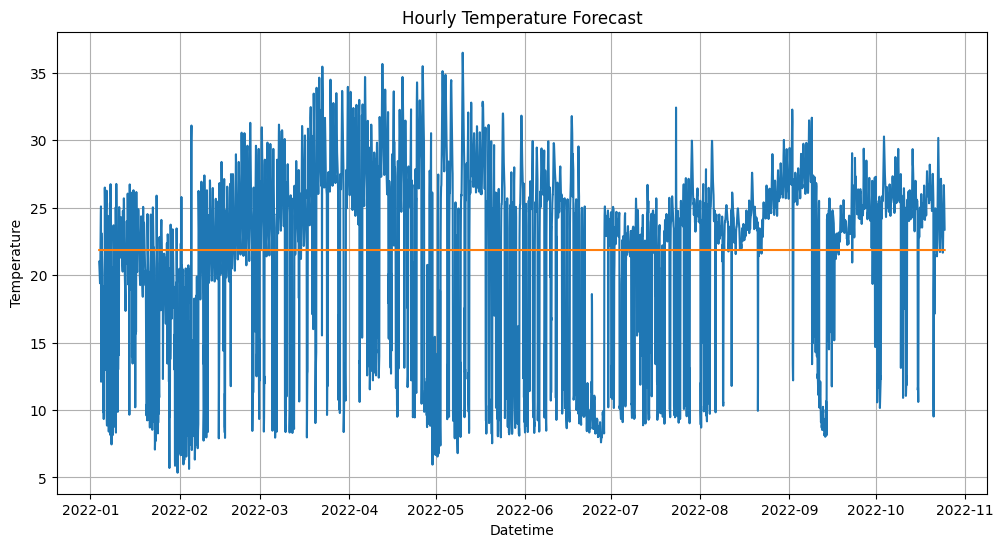

In [70]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'])
plt.plot(data['Hourly_Temp_avg'])
plt.title('Hourly Temperature Forecast')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [71]:
data['Hourly_Temp_movavg'] = data['Hourly_Temp'].rolling(720).mean()

In [72]:
data

,Unnamed: 0,Hourly_Temp,Temp_Diff,Hourly_Temp_avg,Hourly_Temp_movavg
Datetime,,,,,
2022-01-04 01:00:00,1,21.000,0.133,21.86761,NaN
2022-01-04 02:00:00,2,20.867,-0.133,21.86761,NaN
2022-01-04 03:00:00,3,20.650,-0.217,21.86761,NaN
2022-01-04 04:00:00,4,20.400,-0.250,21.86761,NaN
2022-01-04 05:00:00,5,20.100,-0.300,21.86761,NaN
...,...,...,...,...,...
2022-10-24 19:00:00,7051,25.567,-0.593,21.86761,24.422481
2022-10-24 20:00:00,7052,25.183,-0.384,21.86761,24.420929
2022-10-24 21:00:00,7053,24.600,-0.583,21.86761,24.418475


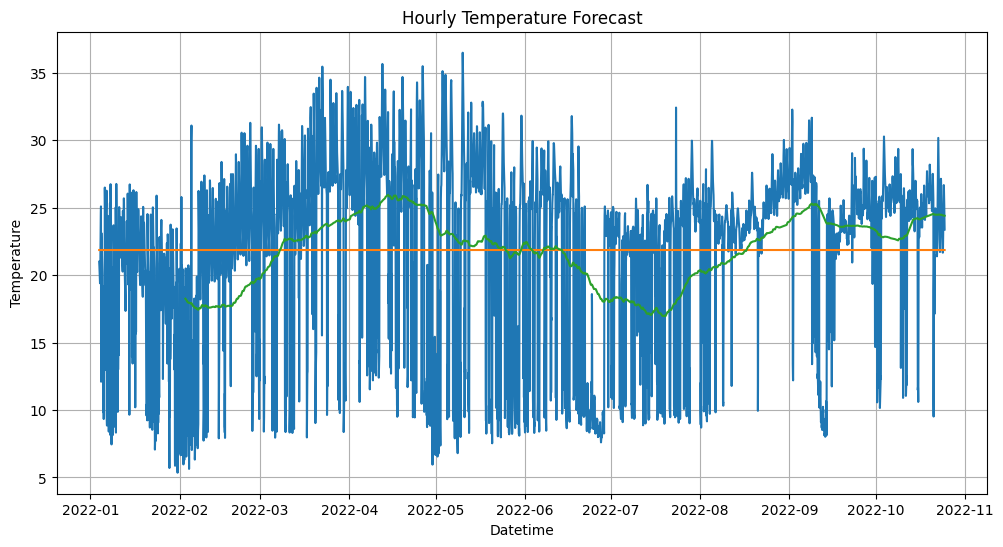

In [73]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'])
plt.plot(data['Hourly_Temp_avg'])
plt.plot(data['Hourly_Temp_movavg'])
plt.title('Hourly Temperature Forecast')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [74]:
import itertools

In [76]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 24)for x in list(itertools.product(p, d, q))]

In [78]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [77]:
seasonal_pdq

[(0, 0, 0, 24),
 (0, 0, 1, 24),
 (0, 1, 0, 24),
 (0, 1, 1, 24),
 (1, 0, 0, 24),
 (1, 0, 1, 24),
 (1, 1, 0, 24),
 (1, 1, 1, 24)]

In [80]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [81]:
for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
            temp_model = SARIMAX(data["Hourly_Temp"], order=param, seasonal_order=param_seasonal, enforce_stationarity=True)
            results=temp_model.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 1)x(0, 1, 1, 24)12 model - AIC:33726.91137435312


In [84]:
best_model = SARIMAX(data['Hourly_Temp'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 24), enforce_stationarity=True)

best_results = best_model.fit()

In [85]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                        Hourly_Temp   No. Observations:                 7055
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 24)   Log Likelihood              -16859.456
Date:                            Fri, 28 Jun 2024   AIC                          33726.911
Time:                                    12:22:26   BIC                          33754.344
Sample:                                01-04-2022   HQIC                         33736.362
                                     - 10-24-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8814      0.006    140.567      0.000       0.869       0.894
ma.L1          0.1236      0.008   

In [86]:
fc_steps = 48
fc = results.get_forecast(steps=fc_steps)